In [36]:
import numpy as np 
import pandas as pd 
import nltk   
import matplotlib.pyplot as plt           
import random 
import os
from collections import Counter 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm

In [135]:
DATA_DIR = "../input/imdb-sentiments/"

In [136]:
data_df = pd.read_csv(DATA_DIR + 'train.csv')
data_df.head()

,text,sentiment
0,For a movie that gets no respect there sure ar...,0
1,Bizarre horror movie filled with famous faces ...,0
2,"A solid, if unremarkable film. Matthau, as Ein...",0
3,It's a strange feeling to sit alone in a theat...,0
4,"You probably all already know this by now, but...",0


In [39]:
data_df.loc[data_df['sentiment']==0].shape, data_df.loc[data_df['sentiment']==1].shape

((12500, 2), (12500, 2))

In [137]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import word_tokenize   # module for tokenizing strings

# Preprocessing

## Removing Punctuation and lower-casing

In [138]:
def remove_punctuation(text):
    return "".join(["" if ch in string.punctuation else ch.lower() for ch in text])

In [139]:
stopwords_english = set(stopwords.words('english'))
def clean_words(headline):
    return [
    word for word in headline
    if word not in stopwords_english
]  

## Stemming

In [140]:
stemmer = PorterStemmer()
def words_stems(headline):
    return [
    stemmer.stem(word) for word in headline
]

## Tokenizing

In [141]:
def tokenize_text(text):
    return word_tokenize(text)

In [142]:
def remove_numbers(text):
    return re.sub("[^a-zA-Z]", " ", text)

# Preprocess

In [143]:
corpus = []

In [144]:
data_df['text'] = data_df['text'].apply(remove_punctuation).apply(remove_numbers).apply(tokenize_text).apply(clean_words)

data_df.head()

,text,sentiment
0,"[movie, gets, respect, sure, lot, memorable, q...",0
1,"[bizarre, horror, movie, filled, famous, faces...",0
2,"[solid, unremarkable, film, matthau, einstein,...",0
3,"[strange, feeling, sit, alone, theater, occupi...",0
4,"[probably, already, know, additional, episodes...",0


# Building corpus

In [145]:
for index, row in tqdm(data_df.iterrows()):
    review = " ".join([token for token in row['text']])
    corpus.append(review)

25000it [00:01, 16295.85it/s]


In [146]:
corpus[1]

'bizarre horror movie filled famous faces stolen cristina raines later tvs flamingo road pretty somewhat unstable model gummy smile slated pay attempted suicides guarding gateway hell scenes raines modeling well captured mood music perfect deborah raffin charming cristinas pal raines moves creepy brooklyn heights brownstone inhabited blind priest top floor things really start cooking neighbors including fantastically wicked burgess meredith kinky couple sylvia miles beverly dangelo diabolical lot eli wallach great fun wily police detective movie nearly crosspollination rosemarys baby exorcistbut combination based bestseller jeffrey konvitz sentinel entertainingly spooky full shocks brought well director michael winner mounts thoughtfully downbeat ending skill'

# Extracting Features

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [148]:
#vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

In [149]:
X = vectorizer.fit_transform(corpus)

In [150]:
encoded_features = X.toarray()

In [151]:
encoded_features.shape

(25000, 5000)

In [ ]:
vocab = vectorizer.get_feature_names()
#print(vocab)

In [152]:
vectorizer.get_feature_names_out()

array(['abandoned', 'abc', 'abilities', ..., 'zombie', 'zombies', 'zone'],
      dtype=object)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    encoded_features, data_df['sentiment'], test_size=0.1, random_state=1234)

In [154]:
X_train.shape, y_train.shape

((22500, 5000), (22500,))

In [155]:
model =  GaussianNB()

In [156]:
model.fit(X_train, y_train)

GaussianNB()

In [157]:
model.score(X_test, y_test)

0.7916

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


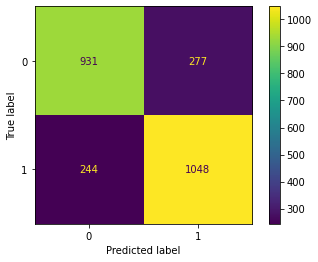

In [158]:
plot_confusion_matrix(model,X_test, y_test)  # doctest: +SKIP
plt.show()

In [172]:
test_string = "It is an absurd movie!"
processed_string = remove_punctuation(test_string)
processed_string = remove_numbers(processed_string)
processed_string = remove_numbers(processed_string)
processed_string = remove_numbers(processed_string)

In [173]:
transformed_text = vectorizer.transform([processed_string])
transformed_text = transformed_text.toarray()

In [174]:
model.predict(transformed_text)

array([1])